In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [67]:
df = pd.read_csv("customers.csv")

In [68]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [69]:
df.shape

(440, 8)

In [70]:
df.nunique()

Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicatessen        403
dtype: int64

In [71]:

# Get the numeric data
df.drop(columns=['Channel','Region'],inplace=True)


In [72]:
df.shape

(440, 6)

In [73]:
# Scale the data first
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
df.iloc[:,:] = scalar.fit_transform(df)

In [74]:
# Reduce the dimension of data
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(df)
reduced_df = pca.transform(df)

In [75]:
reduced_df = pd.DataFrame(reduced_df,columns=['Dim1','Dim2'])

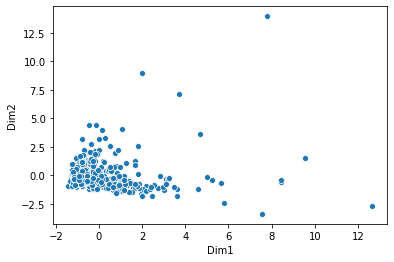

In [76]:
sns.scatterplot(reduced_df['Dim1'],reduced_df['Dim2'])

In [77]:
from sklearn.mixture import GaussianMixture

In [78]:
clusterer = GaussianMixture(n_components=2,random_state=42)
clusterer.fit(reduced_df)
preds = clusterer.predict(reduced_df)

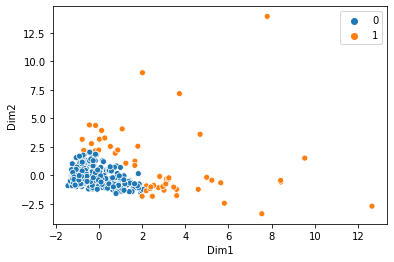

In [79]:
sns.scatterplot(reduced_df['Dim1'],reduced_df['Dim2'],hue=preds)

In [80]:
clusterer.means_

array([[-0.38718089, -0.14107787],
       [ 2.63321709,  0.95947055]])

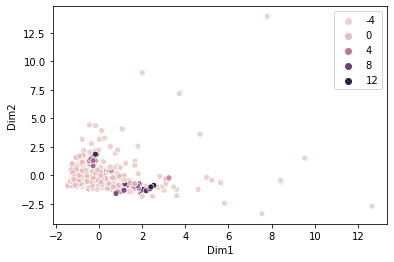

In [84]:
# DBScan
from sklearn.cluster import DBSCAN
clusterer = DBSCAN(eps=0.2,min_samples=3)
clusterer.fit(reduced_df)
sns.scatterplot(reduced_df['Dim1'],reduced_df['Dim2'],hue=clusterer.labels_)